https://bsky.app/profile/testtubegames.com/post/3lbdz5k7vxk2g
Maybe could do the same thing in godot? He's using unity


https://en.m.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi_equation

Can we compare doing this as differential equations odeint vs hami8lton jacobi equation approach

I liked to think of this as a bomb wavefront.

The generating functions were quite confusing

This is another example of the legendre - fourier correspondence.
The least action principle is connected to a steepest descent approximation of a path integral.


|   |   |
|---|---|
| classical | quantum |
| legendre | fourier  |
| add min  | mul plus |
| convex=associative   | linear   |

Convex operators are a category.



These pinchings are related to caustics. There was also some detail about dynamic foci points where least action could convert to greatest action

The action function is given an initial point that sets a bomb off, how much action accumulates if a particle reaches y.
Odd question kind of

In optics its a bit more motivated
The eikonal equation https://en.wikipedia.org/wiki/Eikonal_equation
Fast marching methods. https://en.wikipedia.org/wiki/Fast_marching_method Kind of have a feel of djikstra's algorithm. A* search. What if we used symmettry methods here and computational group theory. Derive an A* heuristic/rigorous lower bound from symettry considerations. We can do the rotation, and the over approximate the cost to snap to a grid point.
Approximate rotational invariance for PDE. Can use as a preconditioner maybe. Cn approximations of 2d rotation group. A rotate + interpolate process can be represented as a matrix. How can we discover approximate symmettries? Something is sparse or low rank or something
 Yershov, D. S.; LaValle, S. M. (2012). "Simplicial Dijkstra and A* Algorithms: From Graphs to Continuous Spaces". Advanced Robotics. 26 (17): 2065–2085.

 symbolic dynamics. We could consider grid points to be areas. In principle, 


WKB semicalssical  https://en.wikipedia.org/wiki/WKB_approximation

symplectic geometry https://en.wikipedia.org/wiki/Symplectic_geometry
contact geometry

The hamilton bellman equaiton https://en.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi%E2%80%93Bellman_equation is directly more motivated. The action function is the value function.
The quadratic case is solvable and corresponds to an Linear quadratic regulator LQR https://en.wikipedia.org/wiki/Linear%E2%80%93quadratic_regulator . LQG https://en.wikipedia.org/wiki/Linear%E2%80%93quadratic%E2%80%93Gaussian_control







In [39]:
import sympy as sp
t,T,m = sp.symbols('t T m')
#v = sp.Function('v')(t)
x = sp.Function('x')
v = x(t).diff(t)
L = m * v**2 / 2
S = sp.Integral(L, (t, 0 , T))

x0, xf, v0 = sp.symbols('x0 xf v0')
eqs  = [
    #sp.Eq(x(t), x0 + v0*t),
    #sp.Eq(x(T), xf),
    sp.Eq(x(T), x(0) + v0*T)
]

"""
S = sp.Function("S")
S(x0,xf,t) = S1
solve = sp.solve(eqs, (x0, xf))
"""
#S.subs(x, x0 + v0*t).doit()
sol = sp.solve(eqs, (v0))
S = S.subs(x(t), x0 + v0*t).doit().subs(v0, sol[v0]).simplify()
pf = S.diff(x(T)).simplify()
pf
#S.diff(x(T))



m*(-x(0) + x(T))/T

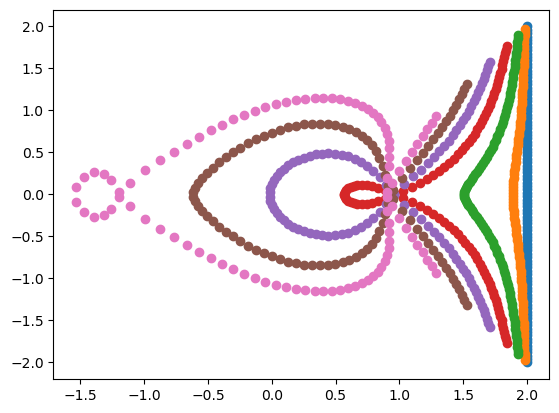

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# dynamics of two 1/r2 spots at +-1
def f(x, t):
    x1, x2, v1, v2 = x.reshape(4, -1)
    dx1 = v1
    dx2 = v2
    r1 = np.sqrt((x1 - 1)**2 + x2**2) + 0.1
    r2 =  np.sqrt((x1 + 1)**2 + x2**2) + 0.1
    dv1 = -(x1 - 1) / r1**3  + -(x1 + 1) / r2**3 
    dv2 =  -x2 / r1**3  + -x2 / r2**3 
    return np.array([dx1, dx2, dv1, dv2]).flatten()

# initial conditions. a line of particles at x = -2
N = 100
x0 = np.array([np.full(N,2), np.linspace(-2, 2, N), np.zeros(N), np.zeros(N)]).flatten()
#assert x0.flatten().reshape(4, -1).shape == x0.shape


# simulate 
S = 7
t = np.linspace(0, 3, S)
x = sp.integrate.odeint(f, x0, t)

# plot temporal surfaces
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(S):
    x1,x2,v1,v2 = x[i,:].reshape(4, -1)
    ax.plot(x1, x2, 'o')

#
# hmmm. Actually we could have L be a component in the odeint. dS/dt = L = v1**2 + v2**2 - V(x1,x2)
# Also maybe we could solve for interesting derivatives?

# Interpolation phase
# S(x0, x1, t)
# use random initial conditions or grid?
# compare derivatives of function with actual v0, vf
# or with closed form.


#def L(sol):
#    x1,x2,v1,v2 = sol.reshape(t, 4, -1)




# Operator

Convex operators.
Hamilton jacobi as propagator.
(possibly re parametrize or solve locally in small steps)




In [ ]:
class Fun():
    vs
    f

class Operator():
    ins
    outs
    F
    def __matmul__(self, psi):
        S = self.F.subs(zip(self.ins, psi.vs)) + psi
        S = S.subs(sp.solve([S.diff(x) for x in xs], xs).items())
        return S 


H = (x0 - x1)**2

def apply(H, xs, phi):
    S = H + phi
    S.subs(sp.solve([S.diff(x) for x in xs], xs).items())


In [ ]:
import sympy 

